<a href="https://colab.research.google.com/github/manojguduri/Identification-Of-Different-Medicinal-Plants-Through-Image-Processing/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d dhiraajkv/ayurvedic-medicinal-plants-and-leaf-segments-images

Dataset URL: https://www.kaggle.com/datasets/dhiraajkv/ayurvedic-medicinal-plants-and-leaf-segments-images
License(s): MIT
100% 12.4G/12.4G [02:57<00:00, 86.1MB/s]
100% 12.4G/12.4G [02:57<00:00, 74.9MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ayurvedic-medicinal-plants-and-leaf-segments-images.zip')
zip_ref.extractall()
zip_ref.close()

In [4]:
from tensorflow.keras.preprocessing.image import load_img
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [5]:
import os
import shutil
import random
from pathlib import Path

# Set parameters
total_images = 1625
num_classes = 30
train_split = 0.8  # 80% for training, 20% for testing

# Define paths
data_dir = Path('/content/all_dataset')
train_dir = Path('/content/train_dir')
test_dir = Path('/content/test_dir')

# Create train and test directories
train_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)

# Get all class directories
all_classes = list(data_dir.glob('*'))

# Randomly select 30 classes
selected_classes = random.sample(all_classes, num_classes)

# Split images into train and test directories
total_selected_images = 0

for class_dir in selected_classes:
    images = list(class_dir.glob('*'))
    random.shuffle(images)

    num_images_to_select = min(len(images), total_images // num_classes)

    split_index = int(train_split * num_images_to_select)
    train_images = images[:split_index]
    test_images = images[split_index:num_images_to_select]

    class_name = class_dir.name

    (train_dir / class_name).mkdir(parents=True, exist_ok=True)
    (test_dir / class_name).mkdir(parents=True, exist_ok=True)

    for img in train_images:
        shutil.copy(img, train_dir / class_name / img.name)

    for img in test_images:
        shutil.copy(img, test_dir / class_name / img.name)

    total_selected_images += num_images_to_select

    if total_selected_images >= total_images:
        break

# Print results
print(f'Selected {total_selected_images} images across {len(selected_classes)} classes.')
print(f'Training data: {sum(len(list((train_dir / c.name).glob("*"))) for c in selected_classes)} images.')
print(f'Test data: {sum(len(list((test_dir / c.name).glob("*"))) for c in selected_classes)} images.')

# Delete the original all_dataset folder
shutil.rmtree(data_dir)
print(f'Deleted the original dataset directory: {data_dir}')

Selected 1571 images across 30 classes.
Training data: 1249 images.
Test data: 322 images.
Deleted the original dataset directory: /content/all_dataset


In [6]:
train_dir = "/content/train_dir"
test_dir="/content/test_dir"

In [7]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [8]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

30 Classes
1249 Train images
322 Test images


In [9]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =512

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True, target_size=(img_width,img_height), batch_size=batch_size)

Found 1249 images belonging to 30 classes.
Found 322 images belonging to 30 classes.


In [11]:
train_generator.class_indices

{'Amaranthus Green_Amaranthus viridis': 0,
 'Amla-Phyllanthus emlica Linn': 1,
 'Avaram_Senna auriculata': 2,
 'Balloon vine_Cardiospermum halicacabum': 3,
 'Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)': 4,
 'Brahmi-Bacopa monnieri': 5,
 'Bristly Wild Grape_Cissus quadrangularis': 6,
 'Cardiospermum halicacabum': 7,
 'Castor-Ricinus communis': 8,
 'Chakte': 9,
 'Common rue(naagdalli)- Ruta graveolens': 10,
 'Dwarf copperleaf (Red)_ Acalypha wilkesiana': 11,
 'Giant Pigweed_Amaranthus titan': 12,
 'Henna-Lausonia inermis': 13,
 'Holy Basil_ Ocimum sanctum': 14,
 'Jamun_Syzygium cumini': 15,
 'Lambs Quarters_Chenopodium album': 16,
 'Madras Pea Pumpkin_Sesbania grandiflora': 17,
 'Malabar_Nut-Justicia adhatoda': 18,
 'Nalta Jute_Corchorus olitorius': 19,
 'Oleander_Nerium oleander': 20,
 'Panicled Foldwing_Dicliptera paniculata': 21,
 'Pea-Pisum sativum': 22,
 'Prickly Chaff Flower_Achyranthes aspera': 23,
 'Roxburgh fig_Ficus auriculata': 24,
 'Shaggy button weed_Diodia teres': 2

In [12]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 84, 84, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 41, 41, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 19, 19, 64)        0

In [13]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


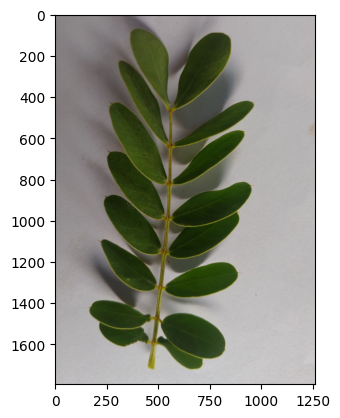

In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img1 = load_img("/content/train_dir/Avaram_Senna auriculata/002_10.jpg")
plt.imshow(img1)
# Preprocess image
img1 = load_img("/content/train_dir/Avaram_Senna auriculata/002_10.jpg", target_size=(256, 256))
img = img_to_array(img1)
img = img / 255
img = np.expand_dims(img, axis=0)

In [16]:
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 58ms/step


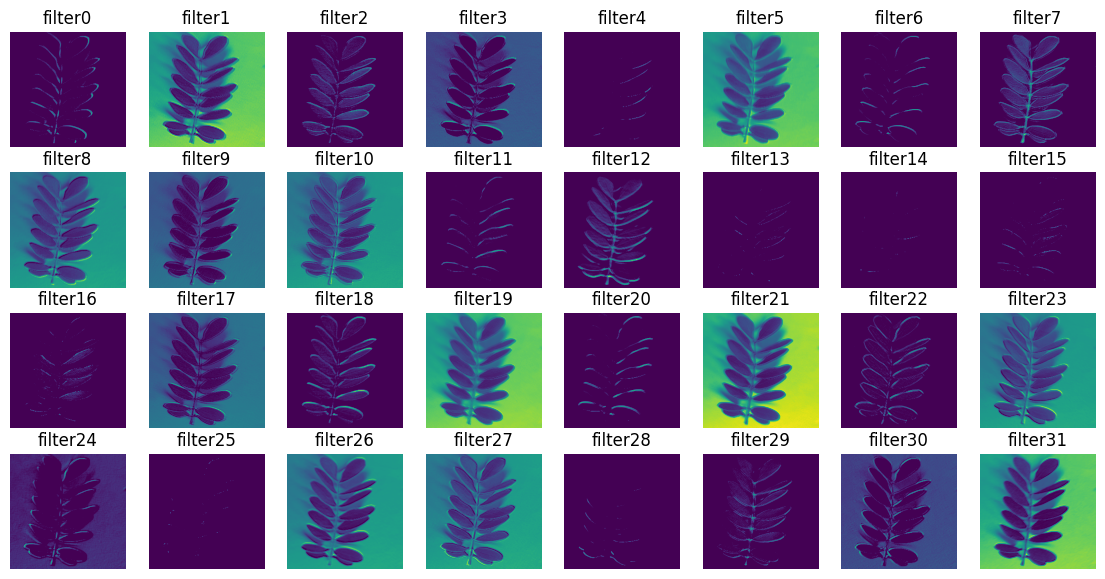

In [17]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

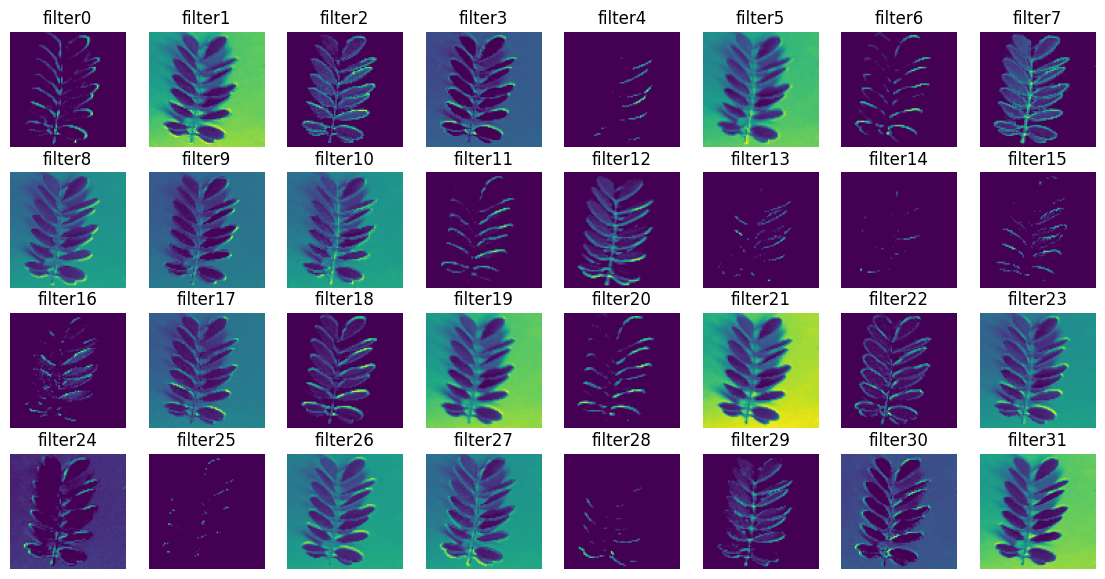

In [18]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

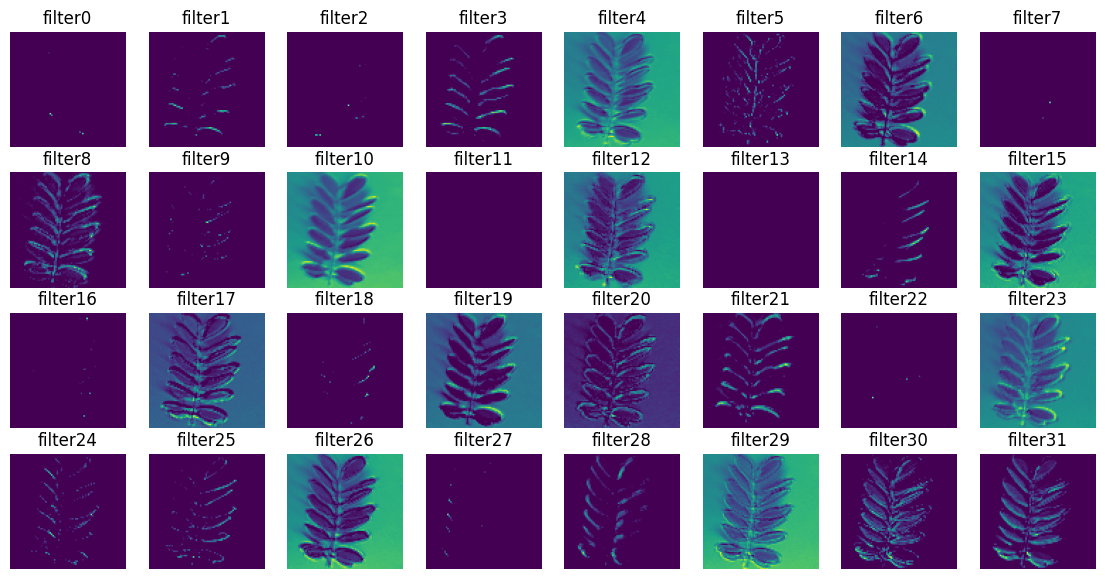

In [19]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

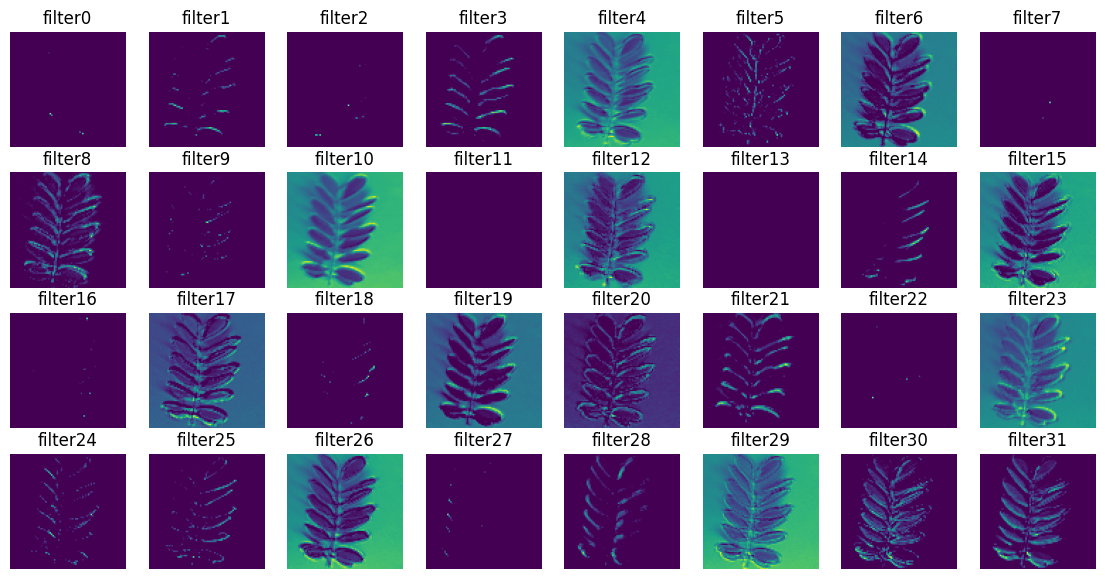

In [20]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

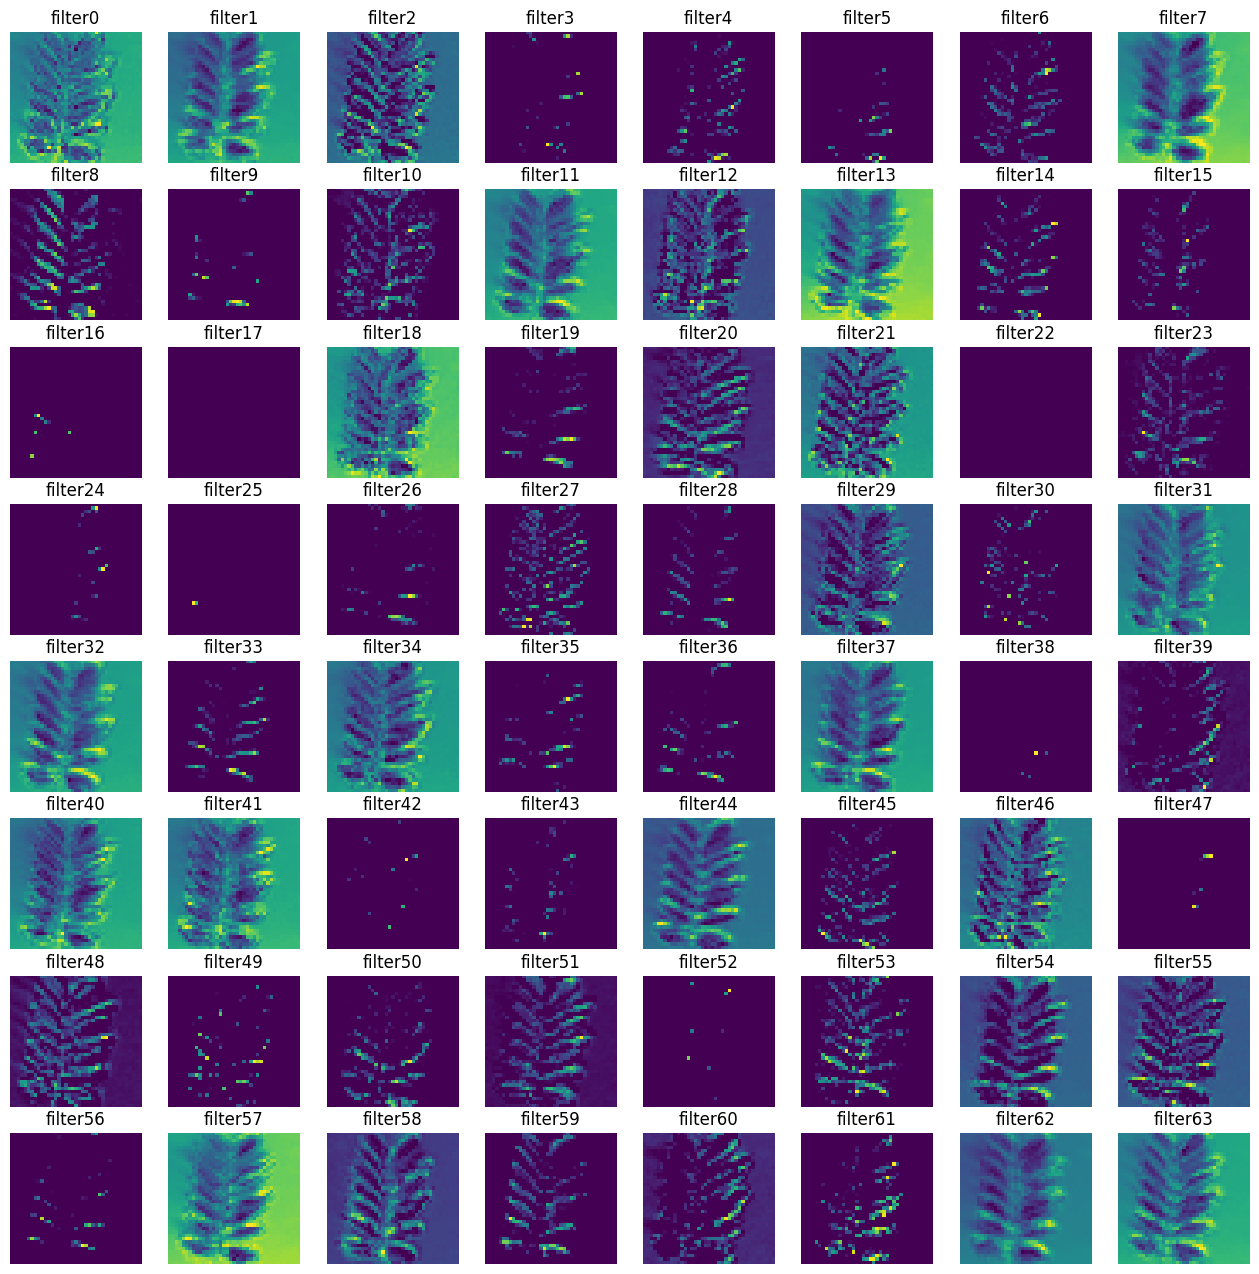

In [21]:
fig=plt.figure(figsize=(16,16))
columns =8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

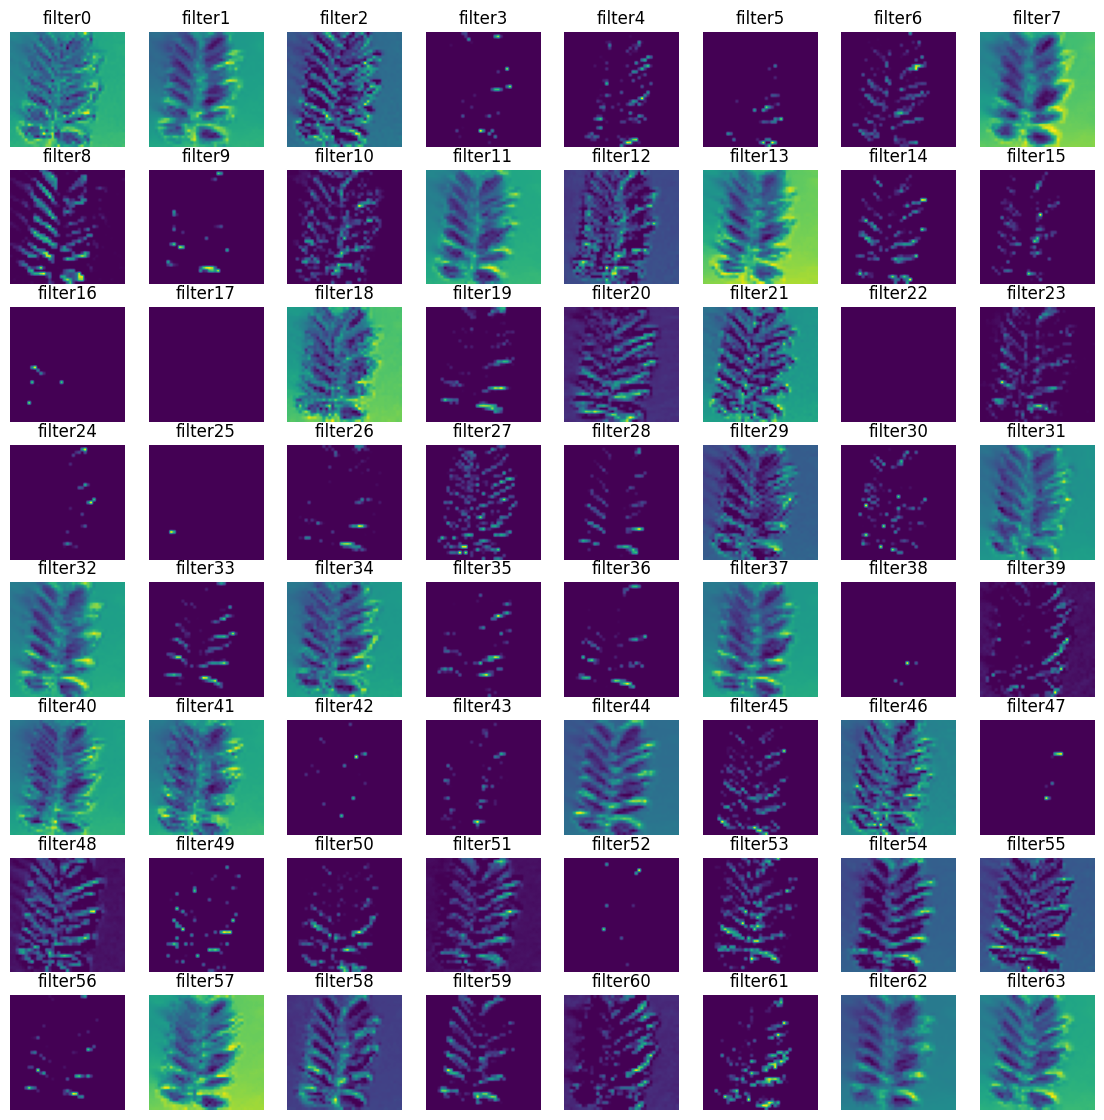

In [22]:
fig=plt.figure(figsize=(14,14))
columns =8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

In [23]:
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=batch_size)

Found 1249 images belonging to 30 classes.


Epoch 1/75
2/2 [==============================] - 110s 74s/step - loss: 3.4806 - accuracy: 0.0488 - val_loss: 3.4985 - val_accuracy: 0.0303
Epoch 2/75
2/2 [==============================] - 107s 100s/step - loss: 3.4366 - accuracy: 0.0339 - val_loss: 3.3792 - val_accuracy: 0.0342
Epoch 3/75
2/2 [==============================] - 77s 68s/step - loss: 3.3819 - accuracy: 0.0448 - val_loss: 3.3640 - val_accuracy: 0.0840
Epoch 4/75
2/2 [==============================] - 76s 68s/step - loss: 3.3548 - accuracy: 0.0828 - val_loss: 3.3213 - val_accuracy: 0.0723
Epoch 5/75
2/2 [==============================] - 79s 63s/step - loss: 3.3113 - accuracy: 0.0947 - val_loss: 3.2174 - val_accuracy: 0.1299
Epoch 6/75
2/2 [==============================] - 83s 66s/step - loss: 3.2122 - accuracy: 0.1260 - val_loss: 3.1073 - val_accuracy: 0.1328
Epoch 7/75
2/2 [==============================] - 78s 70s/step - loss: 3.0808 - accuracy: 0.1493 - val_loss: 2.9125 - val_accuracy: 0.1709
Epoch 8/75
2/2 [========

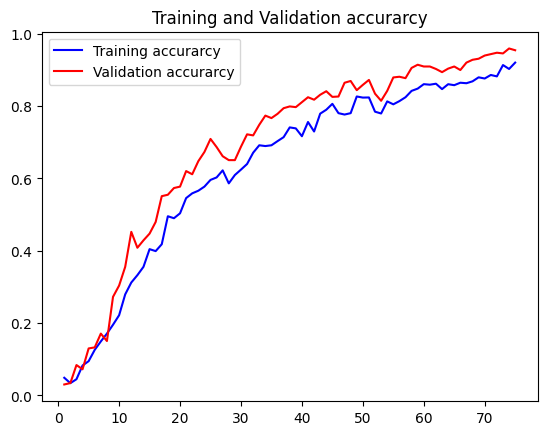

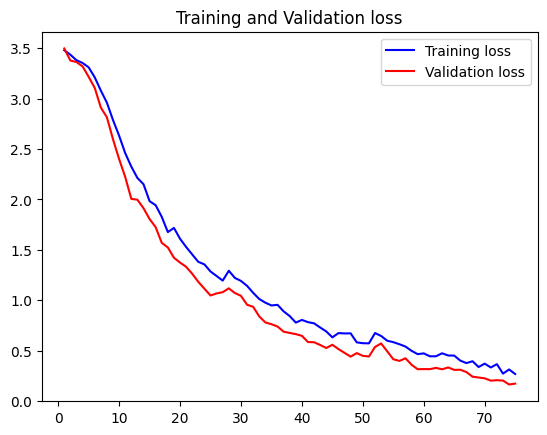

In [24]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
train = model.fit_generator(train_generator,
                            epochs=75,
                            steps_per_epoch=train_generator.samples // batch_size,
                            validation_data=validation_generator,
                            validation_steps=validation_generator.samples // batch_size,
                            verbose=1)


acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [36]:

score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))



1/1 [==============================] - 7s 7s/step - loss: 0.1095 - accuracy: 0.9028
Test score is 0.10950888693332672
Test accuracy is 0.902752034664154


In [26]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('leaf.h5')

In [27]:
# Save model weights.
from keras.models import load_model
model.save_weights('leaf_weights.h5')

In [28]:
# Get classes of model trained on
classes = train_generator.class_indices
classes

{'Amaranthus Green_Amaranthus viridis': 0,
 'Amla-Phyllanthus emlica Linn': 1,
 'Avaram_Senna auriculata': 2,
 'Balloon vine_Cardiospermum halicacabum': 3,
 'Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)': 4,
 'Brahmi-Bacopa monnieri': 5,
 'Bristly Wild Grape_Cissus quadrangularis': 6,
 'Cardiospermum halicacabum': 7,
 'Castor-Ricinus communis': 8,
 'Chakte': 9,
 'Common rue(naagdalli)- Ruta graveolens': 10,
 'Dwarf copperleaf (Red)_ Acalypha wilkesiana': 11,
 'Giant Pigweed_Amaranthus titan': 12,
 'Henna-Lausonia inermis': 13,
 'Holy Basil_ Ocimum sanctum': 14,
 'Jamun_Syzygium cumini': 15,
 'Lambs Quarters_Chenopodium album': 16,
 'Madras Pea Pumpkin_Sesbania grandiflora': 17,
 'Malabar_Nut-Justicia adhatoda': 18,
 'Nalta Jute_Corchorus olitorius': 19,
 'Oleander_Nerium oleander': 20,
 'Panicled Foldwing_Dicliptera paniculata': 21,
 'Pea-Pisum sativum': 22,
 'Prickly Chaff Flower_Achyranthes aspera': 23,
 'Roxburgh fig_Ficus auriculata': 24,
 'Shaggy button weed_Diodia teres': 2

In [30]:
from keras.models import load_model
model=load_model('leaf.h5')
Classes = ['Amaranthus Green_Amaranthus viridis',
 'Amla-Phyllanthus emlica Linn',
 'Avaram_Senna auriculata',
 'Balloon vine_Cardiospermum halicacabum',
 'Beans-Vigna spp. (Genus) or Phaseolus spp. (Genus)',
 'Brahmi-Bacopa monnieri',
 'Bristly Wild Grape_Cissus quadrangularis',

 'Cardiospermum halicacabum',
 'Castor-Ricinus communis',
 'Chakte',
 'Common rue(naagdalli)- Ruta graveolens',
 'Dwarf copperleaf (Red)_ Acalypha wilkesiana',
 'Giant Pigweed_Amaranthus titan',
 'Henna-Lausonia inermis',
 'Holy Basil_ Ocimum sanctum',
 'Jamun_Syzygium cumini',
 'Lambs Quarters_Chenopodium album',
 'Madras Pea Pumpkin_Sesbania grandiflora',
 'Malabar_Nut-Justicia adhatoda',
 'Nalta Jute_Corchorus olitorius',
 'Oleander_Nerium oleander',
 'Panicled Foldwing_Dicliptera paniculata',
 'Pea-Pisum sativum',
 'Prickly Chaff Flower_Achyranthes aspera',
 'Roxburgh fig_Ficus auriculata',
 'Shaggy button weed_Diodia teres',
 'Tamarind_Tamarindus indica',
 'Tinnevelly Senna_Cassia angustifolia (also known as Senna)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'kamakasturi']

1/1 [==============================] - 0s 169ms/step
Tamarind_Tamarindus indica


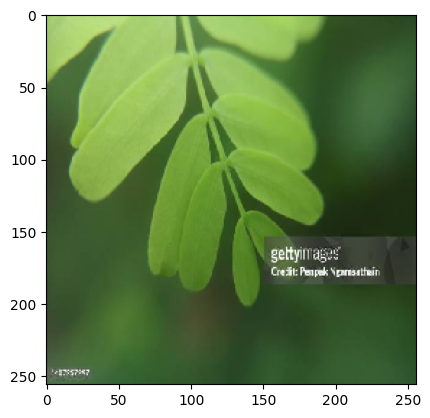

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Pre-Processing test data same as train data.
img_width = 256
img_height = 256


def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x / 255
    return np.expand_dims(x, axis=0)


result = model.predict(
    [prepare("/content/tt leaf.jpg")])
predicted_class = np.argmax(result)
disease = image.load_img(
    "/content/tt leaf.jpg", target_size=(256, 256))
plt.imshow(disease)
print(Classes[predicted_class])

In [33]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('leaf.h5')

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
open("output.tflite", "wb").write(tflite_model)

47722392